# サポートベクターマシン
サポートベクターマシン（Support Vector Machine、SVM）とは、パターン識別のための教師あり機械学習の手法です。  
「マージン最大化」というアイディアに基づいているのですが、しばしば優れたパターン識別能力を発揮します。



## ●サポートベクターマシンとは？  
簡単にするために、2つの特徴量を持つデータを2つのグループに分類する絵を使います。

**（図: サポートベクターマシンの概念）**

サポートベクターマシンとは、グループを明確に分ける境界線を引くための手法です。  
こちらの図の例では、赤と青のクラスを明確に分ける境界線を引いています。  

この図で特徴量は2つ（２次元）なので境界は線になりますが、3次元の場合は境界は面になります。  
数学的に、直線や平面を一般化とした概念に「超平面」があります。  
線形サポートベクターマシンでは、この超平面を使ってn次元のデータの境界を定めます。  

上の図における直線の引き方ですが、「マージン最大化」により決定されます。  
この場合のマージンは、境界となる線からもっとも近い点との距離のことです。  
この場合は、赤と青それぞれのグループから線に最も近い2つずつの点のマージンを最大化するように線を引いています。  
このようなマージンの最大化に使われる境界付近の点を、サポートベクトルと呼びます。
マージンを最大化するために、赤のグループからも青のグループからももっとも遠い境界線を引くことになります。  

この境界線は「分類器」として機能し、新しいデータがどちらのグループに属するかを判別することができます。

## ●データセットの読み込み
今回は、scikit-learnに含まれるワインのデータセットを使用します。

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)  # data: 説明変数
wine_df["class"] = wine.target  # target: 目的変数
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


データセットの説明を表示します。

In [10]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

各統計量を表示します。

In [11]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


ライブラリseabornの`pairplot`により、説明変数同士、及び説明変数と目的変数の関係を一覧表示します。

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


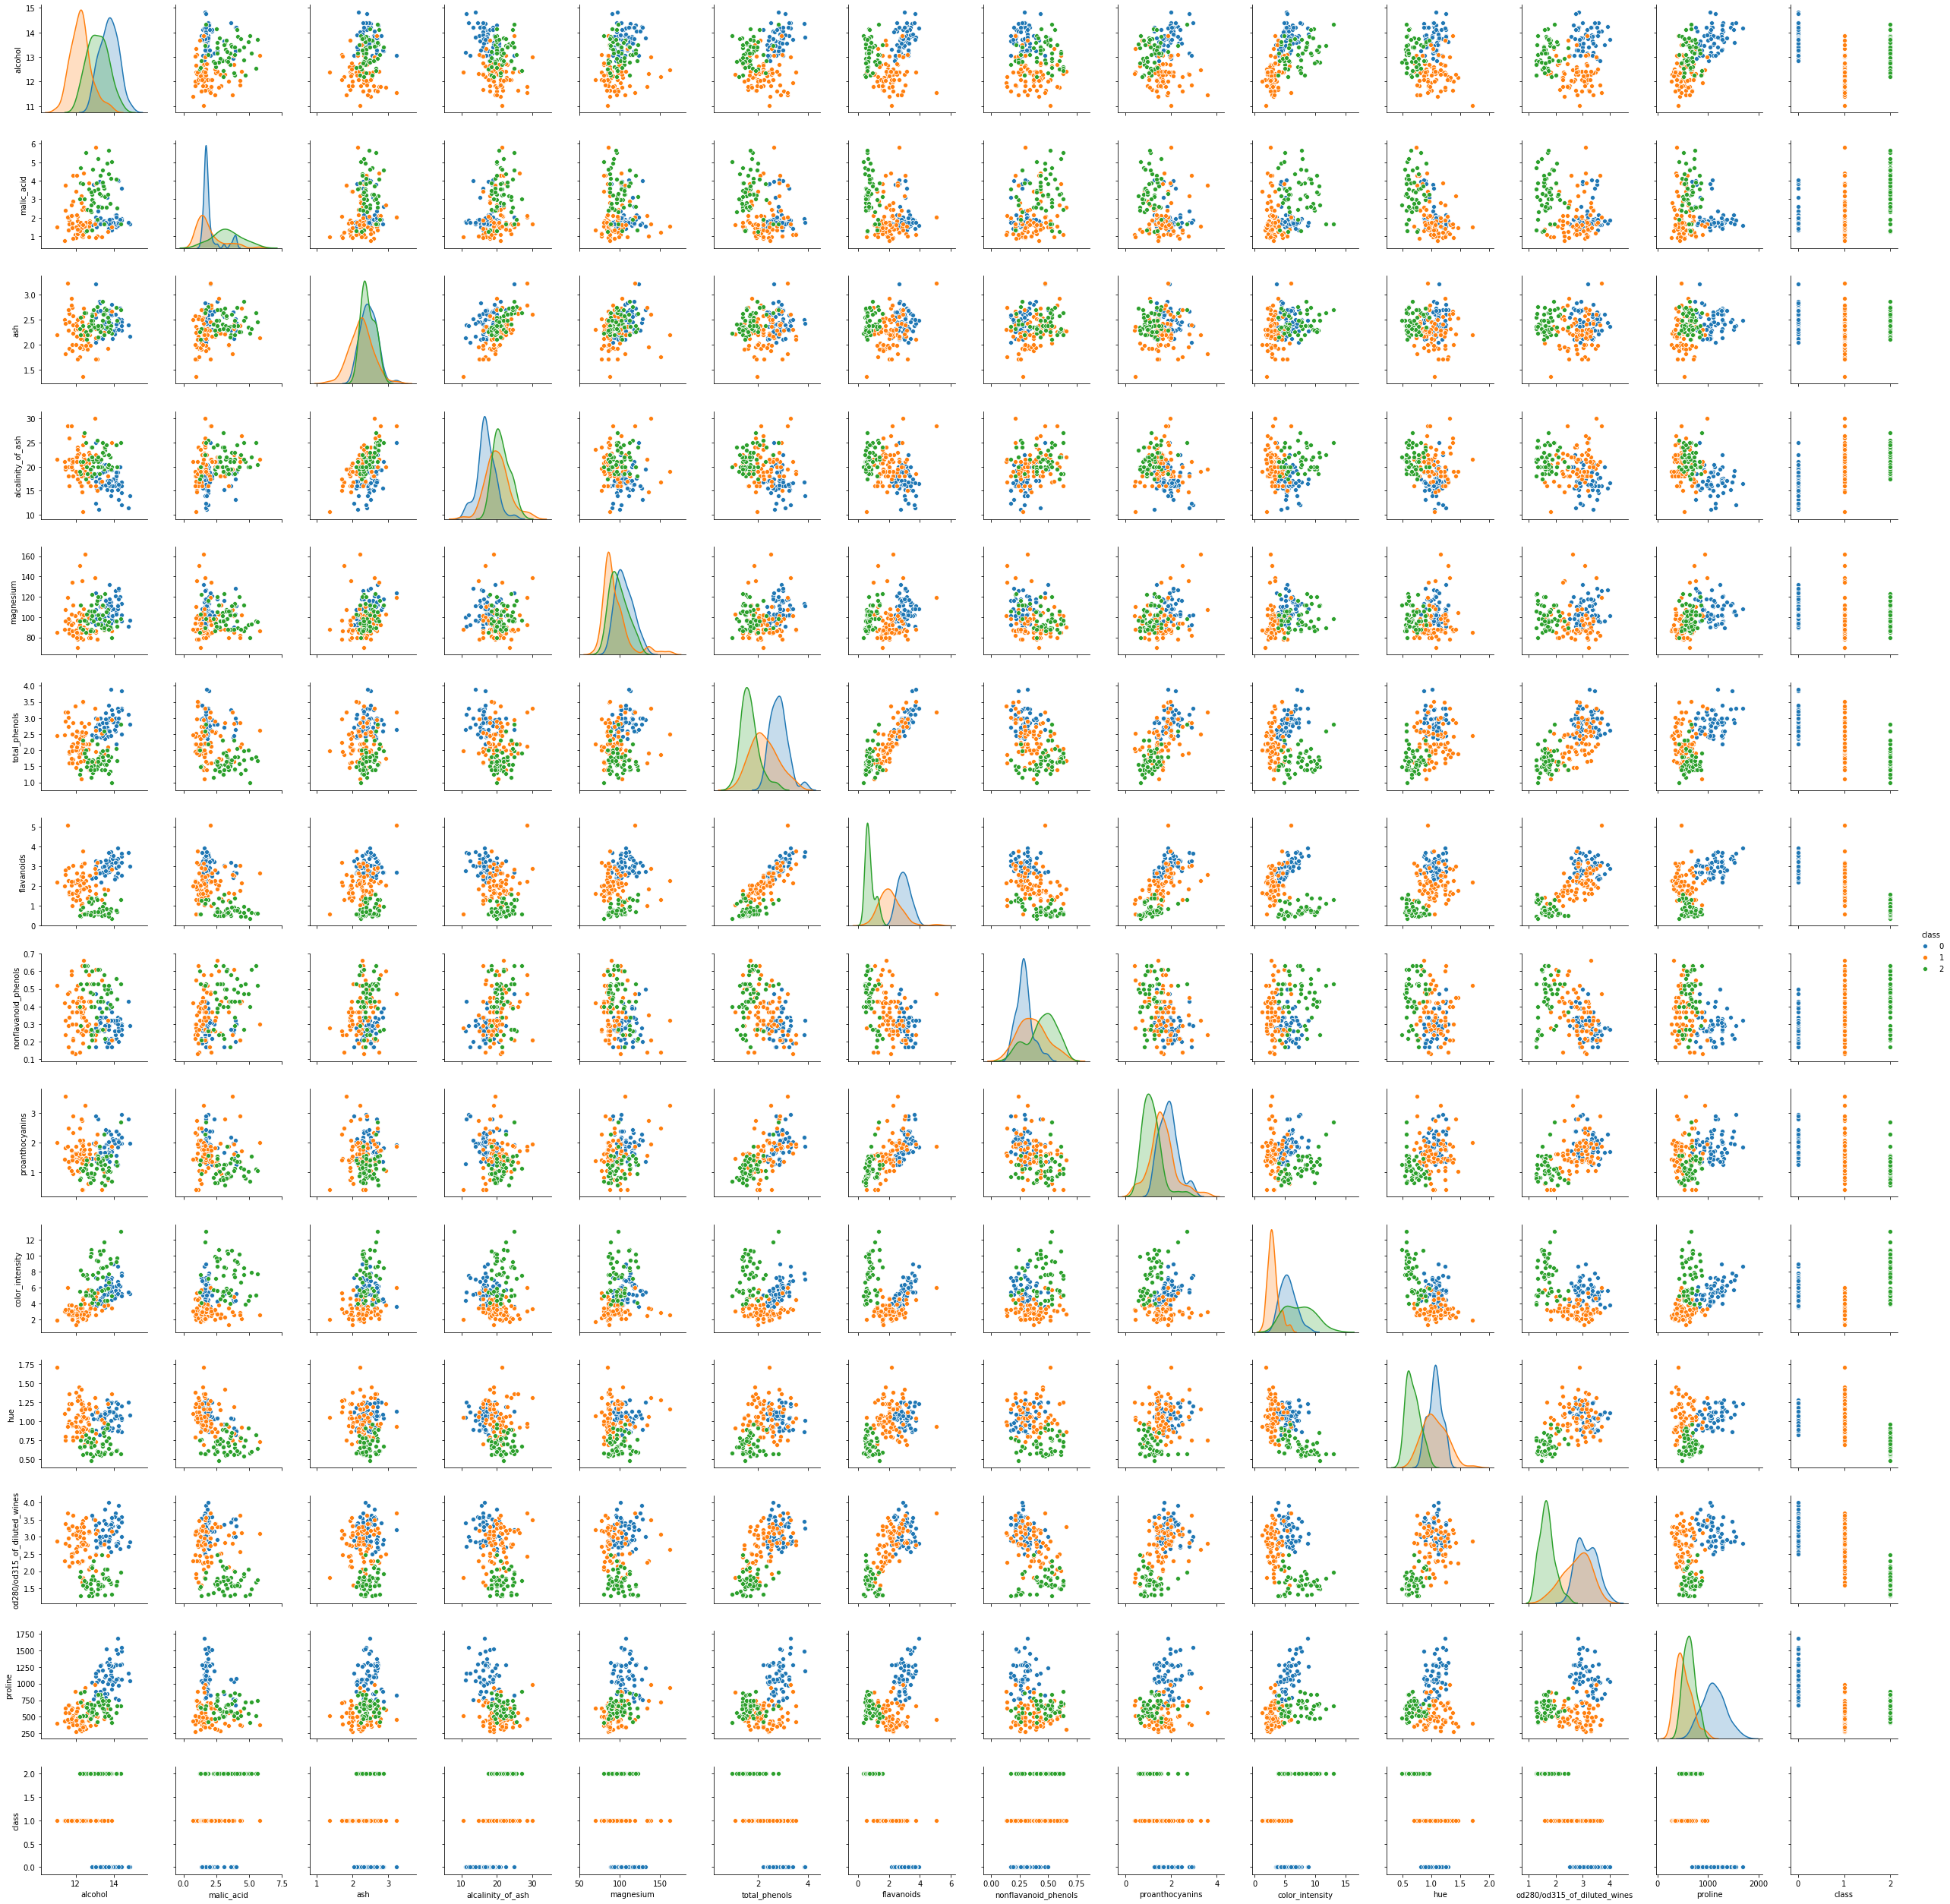

In [12]:
import seaborn as sns

sns.pairplot(wine_df, hue="class")

## ●SVMの実装
サポートベクターマシンを使い、ワインの分類を行います。  
まずは、データセットを訓練用のデータとテスト用のデータに分割し、標準化します。

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 訓練データとテストデータに分割
x_train, x_test, t_train, t_test = train_test_split(wine.data, wine.target, random_state=0) 

# データの標準化
std_scl = StandardScaler()
std_scl.fit(x_train)
x_train = std_scl.transform(x_train)
x_test = std_scl.transform(x_test)

今回は、線形サポートベクターマシンを使い、超平面によりデータを分類します。  

In [14]:
from sklearn.svm import LinearSVC  # 線形ベクターマシン

model = LinearSVC(random_state=0)

# 全ての説明変数を使い学習
model.fit(x_train, t_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

訓練済みのモデルを使い、訓練データ及びテストデータで予測を行います。  
そして、その正解率を測定します。  

In [15]:
from sklearn.metrics import accuracy_score

# 予測結果
y_train = model.predict(x_train)
y_test = model.predict(x_test)
print(y_train, y_test)

# 正解率
acc_train = accuracy_score(t_train, y_train)
acc_test = accuracy_score(t_test, y_test)
print(acc_train, acc_test)

[0 2 1 2 0 2 2 0 2 0 1 2 2 1 2 2 0 1 2 1 1 2 1 0 1 1 1 0 0 1 1 2 2 1 1 1 2
 2 0 2 1 1 1 1 1 0 0 1 0 2 0 2 0 0 1 0 1 1 0 2 1 0 1 1 1 2 0 2 2 0 0 1 2 0
 0 1 1 0 0 0 2 1 0 1 2 0 1 2 2 0 0 2 0 2 1 0 0 1 0 2 1 2 0 2 2 2 0 1 1 1 1
 2 2 1 1 0 1 2 2 0 0 2 1 1 1 0 0 0 1 1 1 0 2] [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]
1.0 1.0


全てのデータのグループ分け結果を、グラフ表示します。

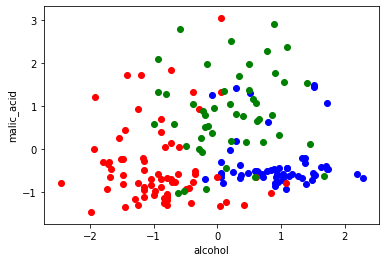

In [16]:
import matplotlib.pyplot as plt

axis_1 = 0
axis_2 = 1

x = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])
t = np.concatenate([t_train, t_test])

# 0にクラス分類されたグループ
group_0 = x[y==0]
plt.scatter(group_0[:, axis_1], group_0[:, axis_2], c="blue")

# 1にクラス分類されたグループ
group_1 = x[y==1]
plt.scatter(group_1[:, axis_1], group_1[:, axis_2], c="red")

# 2にクラス分類されたグループ
group_2 = x[y==2]
plt.scatter(group_2[:, axis_1], group_2[:, axis_2], c="green")

plt.xlabel(wine.feature_names[axis_1])
plt.ylabel(wine.feature_names[axis_2])
plt.show()

なお、結果はハイパーパラーメータを調整することで変化します。  
例えば、LinearSVCの引数として渡すことが可能なハイパーパラメータCは、正則化のためのパラメータです。  
この値を大きくすれば、誤分類によるペナルティが大きくなり、境界が複雑になります。  
ハイパーパラーメータについては、以下の公式ドキュメントを参考にしてください。  
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html